This analysis delves into a dataset provided by a Portuguese banking institution, focusing on their direct marketing campaigns conducted through phone calls. The objective is to build a classification model that predicts a client's likelihood of subscribing to a term deposit. The data encompasses various client attributes like demographics (age, marital status, education), financial situation (balance, loan status), and details of the current marketing campaign (contact type, duration). Additionally, it incorporates information from previous campaigns (number of contacts, outcomes). By leveraging this rich data, we aim to empower the bank to optimize future marketing efforts and target the most receptive customers for term deposit subscriptions.

In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [3]:
data = pd.read_csv('bank.csv', sep=";")
print(data.head())

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


In [5]:
print(data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None


In [4]:
data.rename(columns = {
  'age' : 'Age',
  'job': 'Job_Title',
  'marital':'Marital_Status',
  'education':'Education_Level',
  'default':'In_Default',
  'balance':'Average_Balance',
  'housing':'Has_Housing_Loan',
  'loan': 'Has_Personal_Loan',
  'contact': 'Last_Contact_Type',
  'day':'Day_of_Last_Contact',
  'month': 'Month_of_Last_Contact',
  'duration':'Last_Contact_Duration',
  'campaign': 'Total_Campaign_Contacts',
  'pdays': 'Days_Since_Last_Campaign_Contact',
  'previous':'Previous_Campaign_Contacts',
  'poutcome': 'Previous_Campaign_Outcome',
  'y':'Campaign_Outcome'
}, inplace = True)

In [39]:
print(data.head())

   Age    Job_Title Marital_Status Education_Level In_Default  \
0   30   unemployed        married         primary         no   
1   33     services        married       secondary         no   
2   35   management         single        tertiary         no   
3   30   management        married        tertiary         no   
4   59  blue-collar        married       secondary         no   

   Average_Balance Has_Housing_Loan Has_Personal_Loan Last_Contact_Type  \
0             1787               no                no          cellular   
1             4789              yes               yes          cellular   
2             1350              yes                no          cellular   
3             1476              yes               yes           unknown   
4                0              yes                no           unknown   

   Day_of_Last_Contact Month_of_Last_Contact  Last_Contact_Duration  \
0                   19                   oct                     79   
1               

Study of the demographic attributes. 

In [6]:
print(data[['Age', 'Campaign_Outcome']].groupby('Campaign_Outcome').Age.mean())
print(data.Age.mean())

Campaign_Outcome
no     40.998000
yes    42.491363
Name: Age, dtype: float64
41.17009511170095


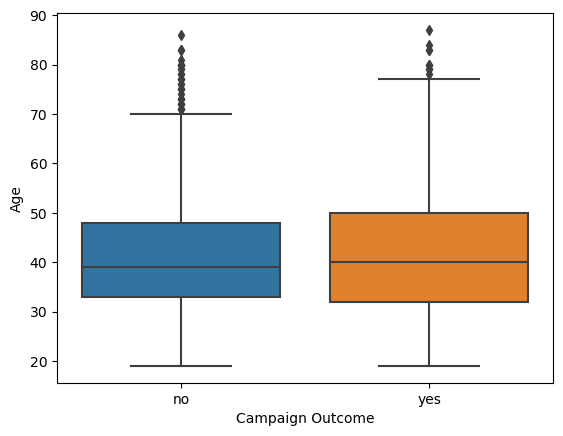

In [28]:
sns.boxplot(x='Campaign_Outcome', y='Age', data=data)
plt.show()

Our analysis revealed minimal differences in the mean age between those who accepted the offer (42.49 years), those who declined (40.99 years), and the overall study population (41.17 years). This suggests that age may not be a significant factor influencing the campaign's outcome.

In [7]:
grouped_data = data.groupby('Job_Title')['Campaign_Outcome'].value_counts().unstack()
grouped_data['YesPercentage'] = grouped_data['yes'] / (grouped_data['no'] + grouped_data['yes']) * 100
grouped_data = grouped_data.sort_values(by='YesPercentage', ascending=False)
grouped_data

Campaign_Outcome,no,yes,YesPercentage
Job_Title,,,
retired,176,54,23.478261
student,65,19,22.619048
unknown,31,7,18.421053
management,838,131,13.519092
housemaid,98,14,12.500000
admin.,420,58,12.133891
self-employed,163,20,10.928962
technician,685,83,10.807292
unemployed,115,13,10.156250


<Figure size 1000x600 with 0 Axes>

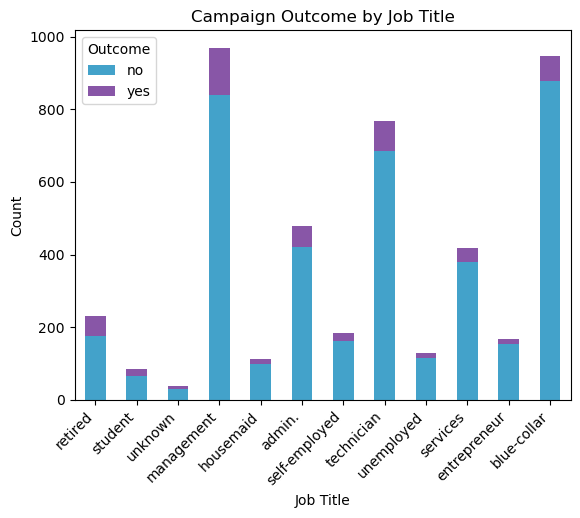

In [8]:
plt.figure(figsize=(10, 6))  
grouped_data[['no', 'yes']].plot(kind='bar', stacked=True, color=['#43a2ca', '#8856a7']) 
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.title('Campaign Outcome by Job Title')
plt.legend(title='Outcome')
plt.xticks(rotation=45, ha='right')  
plt.show()


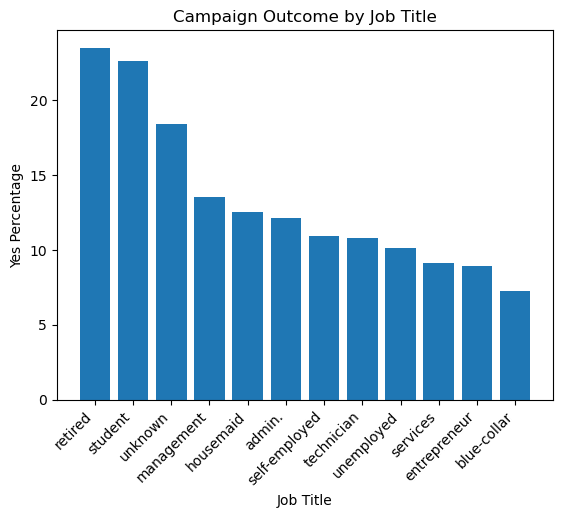

In [9]:
grouped_data = grouped_data.reset_index()
plt.bar( grouped_data['Job_Title'], grouped_data['YesPercentage'])
plt.xlabel('Job Title')
plt.ylabel('Yes Percentage')
plt.title('Campaign Outcome by Job Title')
plt.xticks(rotation=45, ha='right')  
plt.show()

Our campaign resonated most strongly with retirees (23.47%), followed by students (22.61%). Conversely, entrepreneurs (8.92%) and blue-collar workers (7.29%) exhibited the lowest response rates. This suggests the campaign may be less effective in reaching these demographics.

In [10]:
grouped_data02 = data.groupby('Marital_Status')['Campaign_Outcome'].value_counts().unstack()
grouped_data02['YesPercentage'] = grouped_data02['yes'] / (grouped_data02['no'] + grouped_data02['yes']) * 100
grouped_data02= grouped_data02.sort_values(by='YesPercentage', ascending=False)
grouped_data02

Campaign_Outcome,no,yes,YesPercentage
Marital_Status,,,
divorced,451,77,14.583333
single,1029,167,13.963211
married,2520,277,9.903468


<Figure size 800x300 with 0 Axes>

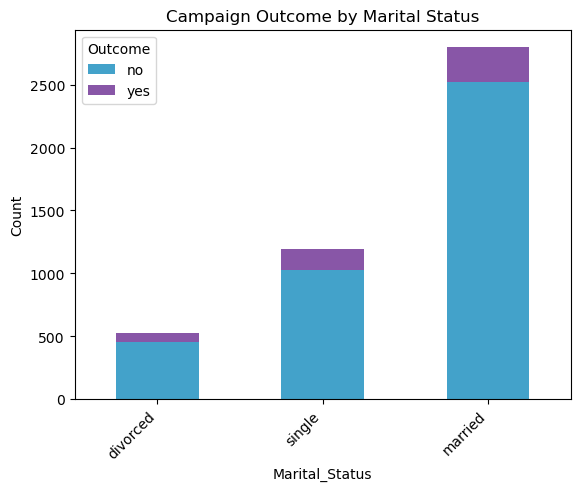

In [11]:
plt.figure(figsize=(8, 3))  
grouped_data02[['no', 'yes']].plot(kind='bar', stacked=True, color=['#43a2ca', '#8856a7']) 
plt.xlabel('Marital_Status')
plt.ylabel('Count')
plt.title('Campaign Outcome by Marital Status')
plt.legend(title='Outcome')
plt.xticks(rotation=45, ha='right')  
plt.show()

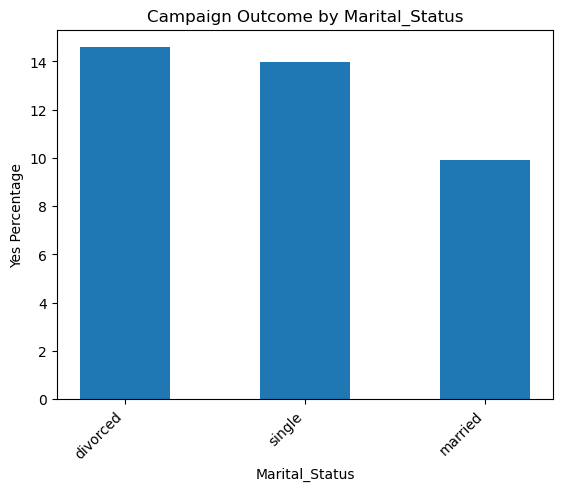

In [13]:
grouped_data02 = grouped_data02.reset_index()
plt.bar( grouped_data02['Marital_Status'], grouped_data02['YesPercentage'], width=0.5)
plt.xlabel('Marital_Status')
plt.ylabel('Yes Percentage')
plt.title('Campaign Outcome by Marital_Status')
plt.xticks(rotation=45, ha='right')  
plt.show()

Our analysis revealed that married individuals showed a lower propensity to subscribe to the term deposit offer compared to divorced and single individuals.

In [14]:
grouped_data03 = data.groupby('Education_Level')['Campaign_Outcome'].value_counts().unstack()
grouped_data03['YesPercentage'] = grouped_data03['yes'] / (grouped_data03['no'] + grouped_data03['yes']) * 100
grouped_data03= grouped_data03.sort_values(by='YesPercentage', ascending=False)
grouped_data03

Campaign_Outcome,no,yes,YesPercentage
Education_Level,,,
tertiary,1157,193,14.296296
secondary,2061,245,10.624458
unknown,168,19,10.160428
primary,614,64,9.439528


<Figure size 800x300 with 0 Axes>

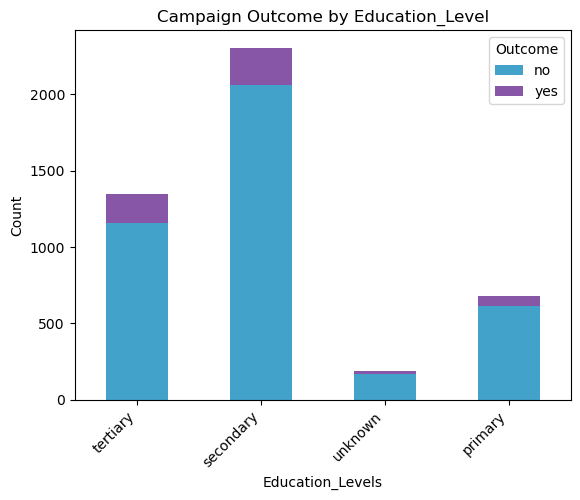

In [17]:
plt.figure(figsize=(8, 3))  
grouped_data03[['no', 'yes']].plot(kind='bar', stacked=True, color=['#43a2ca', '#8856a7']) 
plt.xlabel('Education_Levels')
plt.ylabel('Count')
plt.title('Campaign Outcome by Education_Level')
plt.legend(title='Outcome')
plt.xticks(rotation=45, ha='right')  
plt.show()

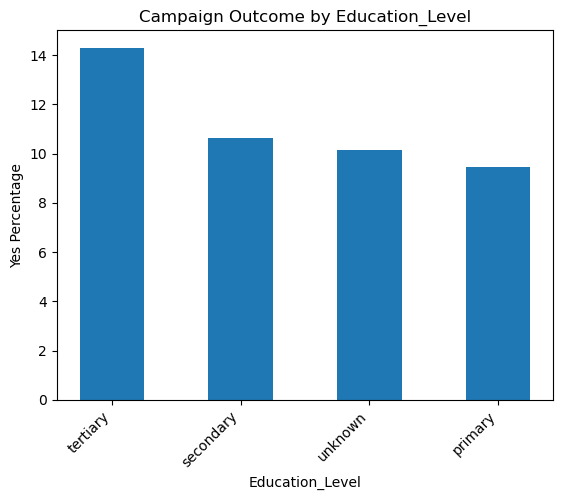

In [70]:
grouped_data03 = grouped_data03.reset_index()
plt.bar( grouped_data03['Education_Level'], grouped_data03['YesPercentage'], width=0.5)
plt.xlabel('Education_Level')
plt.ylabel('Yes Percentage')
plt.title('Campaign Outcome by Education_Level')
plt.xticks(rotation=45, ha='right')  
plt.show()

Our campaign resonated more strongly with individuals possessing a tertiary education (14.29% positive response rate) compared to those with a primary education level (9.43% positive response rate). This suggests a correlation between educational attainment and the likelihood of subscribing to a term deposit.

Investigate the financial characteristics


In [18]:
grouped_data04 = data.groupby('In_Default')['Campaign_Outcome'].value_counts().unstack()
grouped_data04['YesPercentage'] = grouped_data04['yes'] / (grouped_data04['no'] + grouped_data04['yes']) * 100
print(grouped_data04)

Campaign_Outcome    no  yes  YesPercentage
In_Default                                
no                3933  512      11.518560
yes                 67    9      11.842105


Credit default status does not appear to be a major factor influencing offer acceptance.

<Figure size 700x200 with 0 Axes>

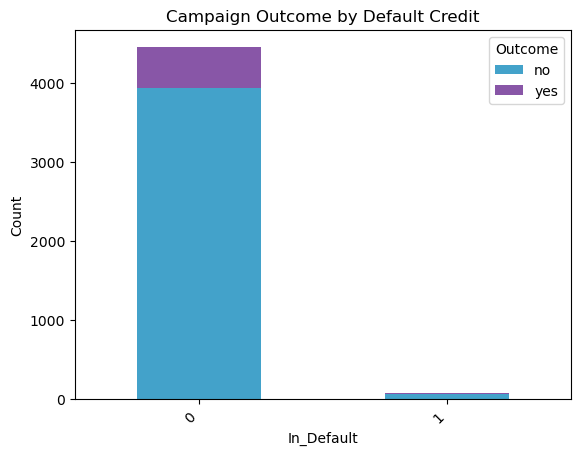

In [22]:

plt.figure(figsize=(7, 2))  
grouped_data04[['no', 'yes']].plot(kind='bar', stacked=True, color=['#43a2ca', '#8856a7']) 
plt.xlabel('In_Default')
plt.ylabel('Count')
plt.title('Campaign Outcome by Default Credit')
plt.legend(title='Outcome')
plt.xticks(rotation=45, ha='right')  
plt.show()

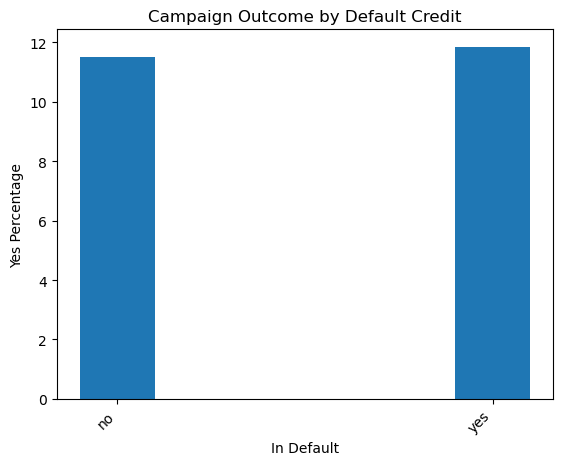

In [23]:
grouped_data04 = grouped_data04.reset_index()

plt.bar( grouped_data04['In_Default'], grouped_data04['YesPercentage'], width=0.2)
plt.xlabel('In Default')
plt.ylabel('Yes Percentage')
plt.title('Campaign Outcome by Default Credit')
plt.xticks(rotation=45, ha='right')  
plt.show()

In [24]:
grouped_data05 = data.groupby('Campaign_Outcome').Average_Balance.mean()
print(grouped_data05)

Campaign_Outcome
no     1403.211750
yes    1571.955854
Name: Average_Balance, dtype: float64


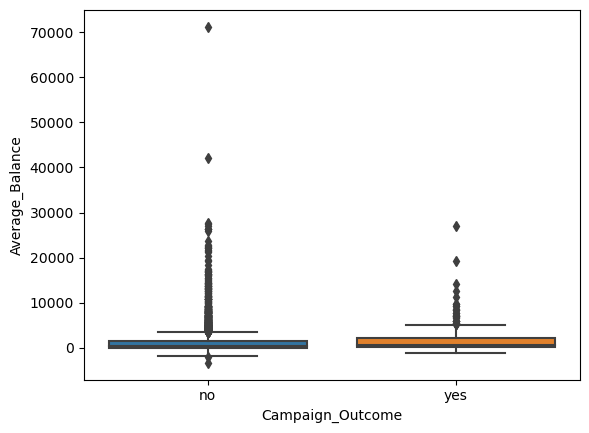

In [25]:
sns.boxplot(x='Campaign_Outcome', y='Average_Balance', data=data)
plt.show()

There is a positive difference in average account balance between customers who subscribed to the term deposit and those who declined. However, this difference is relatively modest, at approximately €169.

In [26]:
grouped_data06 = data.groupby('Has_Housing_Loan')['Campaign_Outcome'].value_counts().unstack()
grouped_data06['YesPercentage'] = grouped_data06['yes'] / (grouped_data06['no'] + grouped_data06['yes']) * 100
grouped_data06

Campaign_Outcome,no,yes,YesPercentage
Has_Housing_Loan,,,
no,1661,301,15.341488
yes,2339,220,8.597108


<Figure size 700x200 with 0 Axes>

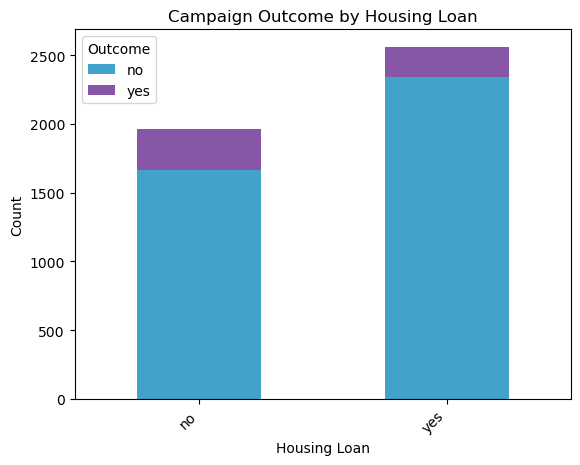

In [28]:
plt.figure(figsize=(7, 2))  
grouped_data06[['no', 'yes']].plot(kind='bar', stacked=True, color=['#43a2ca', '#8856a7']) 
plt.xlabel('Housing Loan')
plt.ylabel('Count')
plt.title('Campaign Outcome by Housing Loan')
plt.legend(title='Outcome')
plt.xticks(rotation=45, ha='right')  
plt.show()

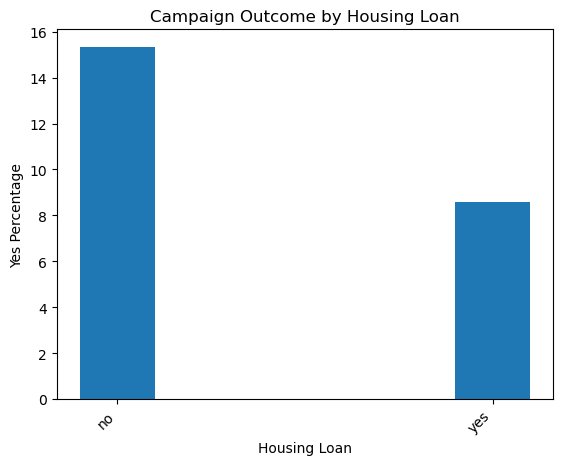

In [29]:
grouped_data06 = grouped_data06.reset_index()

plt.bar( grouped_data06['Has_Housing_Loan'], grouped_data06['YesPercentage'], width=0.2)
plt.xlabel('Housing Loan')
plt.ylabel('Yes Percentage')
plt.title('Campaign Outcome by Housing Loan')
plt.xticks(rotation=45, ha='right')  
plt.show()

In [30]:
grouped_data07 = data.groupby('Has_Personal_Loan')['Campaign_Outcome'].value_counts().unstack()
grouped_data07['YesPercentage'] = grouped_data07['yes'] / (grouped_data07['no'] + grouped_data07['yes']) * 100
grouped_data07

Campaign_Outcome,no,yes,YesPercentage
Has_Personal_Loan,,,
no,3352,478,12.480418
yes,648,43,6.222865


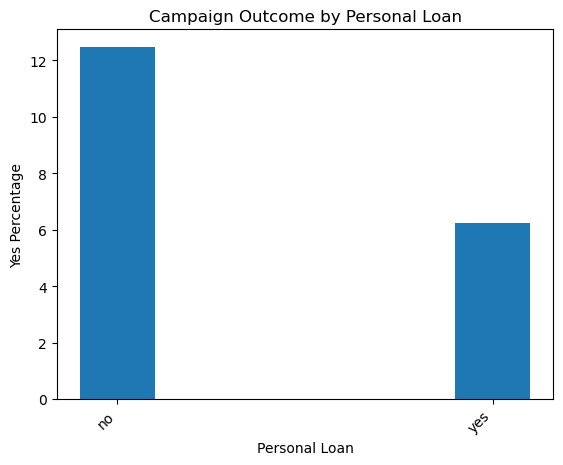

In [32]:
grouped_data07 = grouped_data07.reset_index()

plt.bar( grouped_data07['Has_Personal_Loan'], grouped_data07['YesPercentage'], width=0.2)
plt.xlabel('Personal Loan')
plt.ylabel('Yes Percentage')
plt.title('Campaign Outcome by Personal Loan')
plt.xticks(rotation=45, ha='right')  
plt.show()

Our campaign for term deposits appears to have had a limited impact on the segment of consumers with existing housing or personal loans.

Analysis of campaign performance based on its parameters.

In [25]:
print(data['Last_Contact_Type'].unique())

['cellular' 'unknown' 'telephone']


In [33]:
grouped_data08 = data.groupby('Last_Contact_Type').Campaign_Outcome.value_counts().unstack()
grouped_data08['YesPercentage'] = grouped_data08['yes'] / (grouped_data08['no'] + grouped_data08['yes']) * 100
grouped_data08


Campaign_Outcome,no,yes,YesPercentage
Last_Contact_Type,,,
cellular,2480,416,14.364641
telephone,257,44,14.617940
unknown,1263,61,4.607251


Contact type, whether cellular or telephone, does not appear to be a significant factor in campaign success.

In [34]:
grouped_data09 = data.groupby('Month_of_Last_Contact').Campaign_Outcome.value_counts().unstack()
grouped_data09['YesPercentage'] = grouped_data09['yes'] / (grouped_data09['yes'] + grouped_data09['no']) * 100
grouped_data09 = grouped_data09.sort_values(by='YesPercentage', ascending=False)
grouped_data09

Campaign_Outcome,no,yes,YesPercentage
Month_of_Last_Contact,,,
oct,43,37,46.250000
dec,11,9,45.000000
mar,28,21,42.857143
sep,35,17,32.692308
apr,237,56,19.112628
feb,184,38,17.117117
aug,554,79,12.480253
jan,132,16,10.810811
jun,476,55,10.357815


Campaign success rates are highest in October, December, and March. Conversely, July and May exhibit the lowest success rates.

In [43]:
print(data['Total_Campaign_Contacts'].unique())

[ 1  4  2  5  3  6 18 10  9  7 12 14 13 24 11  8 29 32 16 22 15 30 25 21
 17 19 23 20 50 28 31 44]


In [36]:
grouped_data10 = data.groupby('Total_Campaign_Contacts').Campaign_Outcome.value_counts().unstack()
grouped_data10['YesPercentage'] = grouped_data10['yes'] / (grouped_data10['yes'] + grouped_data10['no']) * 100
grouped_data10 = grouped_data10.sort_values(by='YesPercentage', ascending=False)
grouped_data10 


Campaign_Outcome,no,yes,YesPercentage
Total_Campaign_Contacts,,,
24,2.0,1.0,33.333333
17,6.0,1.0,14.285714
1,1494.0,240.0,13.840830
4,282.0,43.0,13.230769
13,15.0,2.0,11.764706
2,1126.0,138.0,10.917722
6,139.0,16.0,10.322581
3,501.0,57.0,10.215054
7,69.0,6.0,8.000000


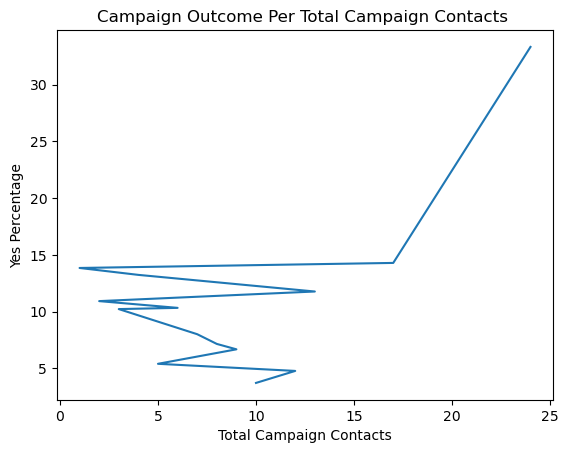

In [39]:
grouped_data10 = grouped_data10.reset_index()
plt.plot(grouped_data10['Total_Campaign_Contacts'], grouped_data10['YesPercentage'])

plt.xlabel('Total Campaign Contacts')
plt.ylabel('Yes Percentage')
plt.title('Campaign Outcome Per Total Campaign Contacts ')

plt.show()

There is no clear correlation between the number of campaign contacts and campaign outcome.

In [83]:
grouped_data11 = data.groupby('Previous_Campaign_Outcome').Campaign_Outcome.value_counts().unstack()
grouped_data11['YesPercentage'] = grouped_data11['yes'] / (grouped_data11['yes'] + grouped_data11['no']) * 100
grouped_data11 = grouped_data11.sort_values(by='YesPercentage', ascending=False)
grouped_data11

Campaign_Outcome,no,yes,YesPercentage
Previous_Campaign_Outcome,,,
success,46,83,64.341085
other,159,38,19.289340
failure,427,63,12.857143
unknown,3368,337,9.095816


 Individuals who responded favorably to the prior campaign exhibit a higher likelihood of positive engagement with the current campaign.

This analysis of a Portuguese banking institution's direct marketing campaign for term deposits revealed several key insights:

Age may not be a significant factor: While the campaign resonated most with retirees and students, the average age difference between subscribers and non-subscribers was minimal.
Targeting considerations: Entrepreneurs and blue-collar workers exhibited lower response rates, suggesting the campaign might need refinement to reach these demographics more effectively.
Education level as a potential factor: A positive correlation emerged between educational attainment and the likelihood of subscribing. Individuals with a tertiary education showed a higher positive response rate.
Credit default has minimal impact: Creditworthiness did not significantly influence offer acceptance.
Account balance and existing loans: Subscribers possessed a slightly higher average account balance, but the difference was modest (€169). Existing housing or personal loans appeared to limit the campaign's impact on that segment.
Campaign timing matters: Campaign success rates were highest in October, December, and March, while July and May exhibited lower rates. Optimizing campaign timing could be beneficial.
No clear impact of contact frequency: The number of contacts during the campaign did not show a clear correlation with success.
Past responders are more receptive: Individuals who responded positively to previous campaigns were more likely to engage favorably with the current one. This suggests potential benefits in retargeting past responders.
Overall, this analysis provides valuable insights into factors influencing term deposit subscription behavior. By considering these findings, the bank can refine future marketing campaigns for better targeting, timing, and content development, ultimately leading to improved customer engagement and product adoption.